In [1]:
%reload_ext autoreload
%autoreload 2

In [11]:
import numpy as np
from matplotlib.patches import Patch
import pandas as pd
import similarity

backend_cards = similarity.make(package="backend:backends", key="backends", use_cache=True)
default_backend = similarity.make(package="backend:backends", key="default_backend", use_cache=True)

metric_cards = similarity.make("measure", return_config=True)
metric_names = list(metric_cards.keys())
print("loaded")
# backend_cards = similarity.make("backend.card")
# metric_names = list(similarity.make("metric", return_config=True).keys())

loaded


In [13]:
for name in metric_names:
    if name not in default_backend:
        default_backend[name] = "No implementation"

# metric_names = list(default_backend.keys())
# metric_names = similarity.make(package="backend:backends", key="metric_names", use_cache=False)

backend_metrics = {}
print(backend_cards)
for k, backend in backend_cards.items():
    print(k)
    backend_metrics[k] = {}
    for metric in metric_names:
        print(metric)
        if k == default_backend[metric]:
            backend_metrics[k][metric] = 2
        elif metric in backend["measure"]:
            backend_metrics[k][metric] = 1.5
        else:
            backend_metrics[k][metric] = 0

# backend_metrics = {
#     k: [metric in backend["metrics"] for metric in all_metrics]
#     for k, backend in backend_cards.items()
# }

backend_df = pd.DataFrame.from_dict(backend_metrics, orient="index", columns=metric_names)
# print(backend_df)



{'netrep': {'github': 'https://github.com/ahwillia/netrep', 'paper': [{'citation': 'Alex H. Williams, Erin Kunz, Simon Kornblith, and Scott W. Linderman. 2021. Generalized Shape Metrics on Neural Representations. In NeurIPS.', 'github': 'https://github.com/ahwillia/netrep'}], 'measure': {'procrustes': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'cca-angular': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'cca-euclidean': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'svcca': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'permutation': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'svcca-var95': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'svcca-var99': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'cka-angular': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'cca': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'procrustes-sq-euclidean': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'procrustes-score': Metric[fit(X, Y), score(X, Y), fit_score(X, Y)], 'sh

In [14]:
# TODO: default backend
default_backend_df = pd.DataFrame.from_dict(default_backend, orient="index", columns=["default_backend"])
# print(default_backend_df)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_backend_metrics(backend_df, save_path=None):
    # plt.figure(figsize=(4, 3), dpi=100)
    plt.figure(figsize=(6+0.8*len(metric_names), 1+0.15*len(backend_cards)), dpi=100)
    ax = sns.heatmap(backend_df, annot=False, cmap="viridis", cbar=False, linewidths=0, linecolor='white')
    plt.ylabel("Backends", fontsize=13)
    plt.xlabel("Measures", fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.gca().xaxis.set_label_position('top') 
    # plt.tick_params(length=0)  # Removing the small tick bars
    plt.xticks(rotation=45, ha='left')
    plt.yticks(rotation=0, va='center')
    plt.axis('scaled')
    # plt.show()

    # Adding a categorical legend
    cmap = sns.color_palette("viridis", as_cmap=True)
    normalized_values = backend_df.values / backend_df.values.max()  # Normalize the values to the range [0, 1]
    unique_values = np.unique(normalized_values)  # Unique normalized values

    # Getting the corresponding colors from the colormap
    legend_colors = [cmap(value) for value in unique_values]

    # Creating legend elements with the correct colors
    labels = ['Not implemented', 'Implemented', 'Default implementation']
    legend_elements = [
        Patch(facecolor=legend_colors[i], label=labels[i])
        for i in range(len(unique_values))
    ]
    # Display the legend
    plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3,
        handlelength=1, handleheight=1, frameon=False, fontsize=13)

    # TODO: make figure in github action on push
    # TODO: figures for dark and light modes (transparent=True)
    if save_path:
        plt.savefig(save_path, transparent=False, bbox_inches='tight', dpi=300)

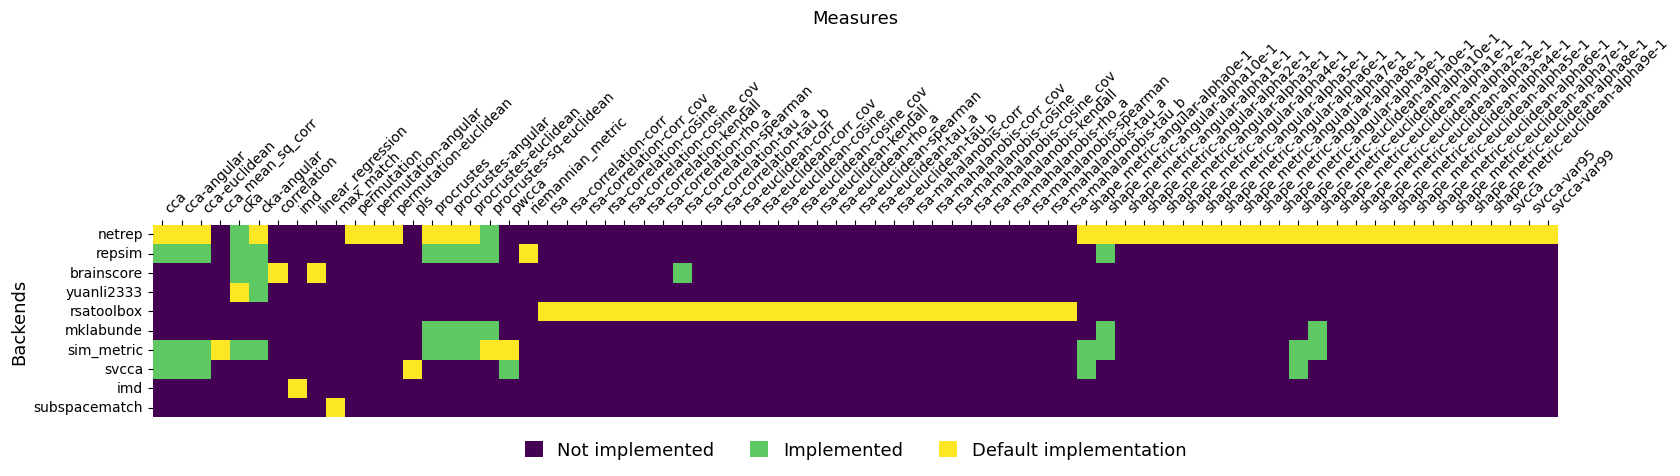

In [30]:
# order cols by alphabetical order
backend_df = backend_df[sorted(backend_df.columns)]
plot_backend_metrics(backend_df, save_path="../figures/backend_metrics.png")
plt.show()

In [6]:
# similarity.make("sim_metric")

In [7]:
backend_scores = {}
for k, backend in backend_cards.items():
    backend_scores[k] = {}
    for metric in metric_names:
        if k == default_backend[metric]:
            backend_scores[k][metric] = 2
        elif metric in backend["metrics"]:
            backend_scores[k][metric] = 1.5
        else:
            backend_scores[k][metric] = 0

consistency_df = pd.DataFrame.from_dict(backend_scores, orient="index", columns=metric_names)

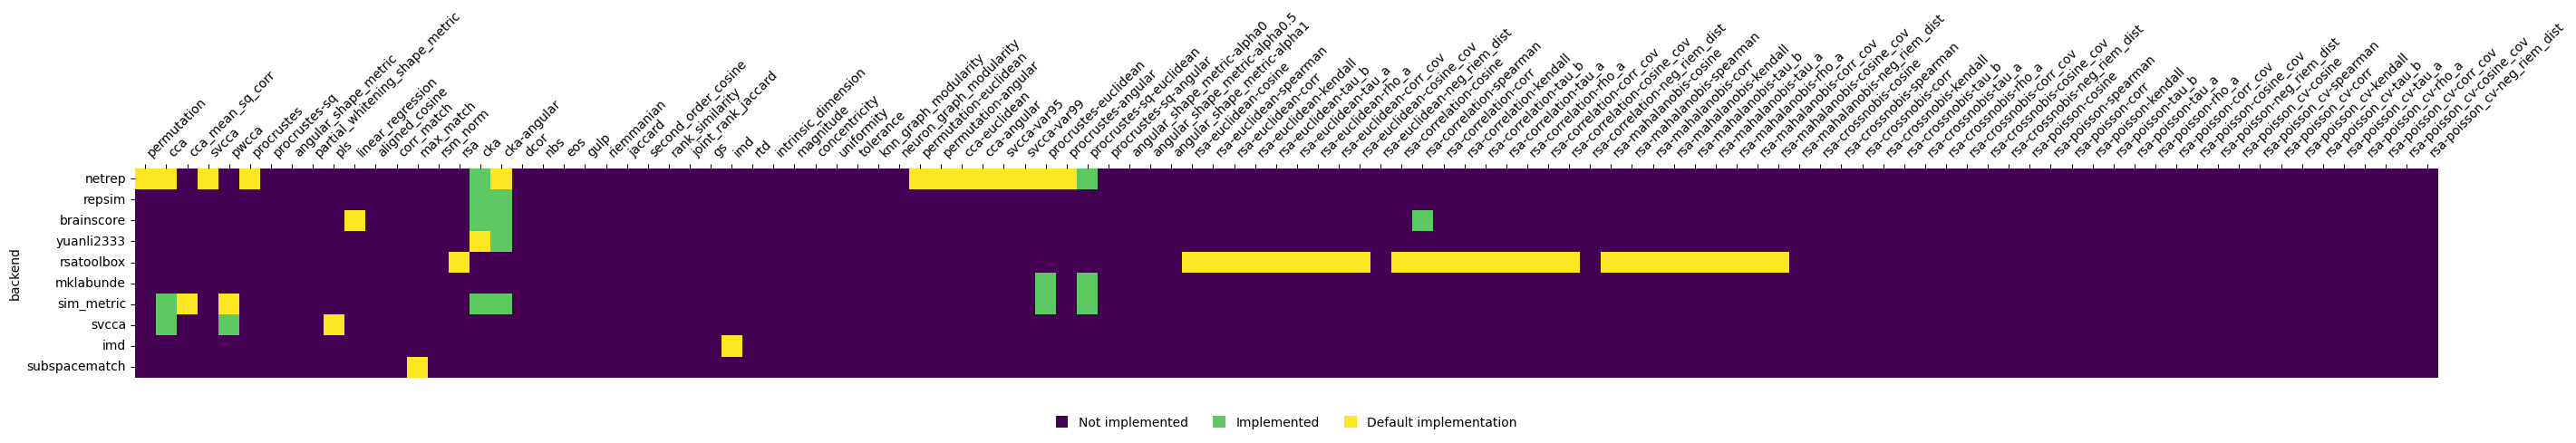

In [8]:
plot_backend_metrics(consistency_df)

In [20]:
backend_metrics = similarity.make(package="backend:backends", key="metric_by_backend", use_cache=False)
print(backend_metrics)

backend_by_metric = similarity.make(package="backend:backends", key="backend_by_metric", use_cache=False)
print(backend_by_metric)

{'netrep': ['procrustes', 'cca', 'svcca', 'svcca-var95', 'svcca-var99', 'permutation', 'cka-angular', 'permutation-euclidean', 'permutation-angular'], 'brainscore': ['linear_regression', 'cka', 'rsa-correlation-spearman'], 'yuanli2333': ['cka'], 'rsatoolbox': ['rsa', 'rsa-euclidean-cosine', 'rsa-euclidean-spearman', 'rsa-euclidean-corr', 'rsa-euclidean-kendall', 'rsa-euclidean-tau_b', 'rsa-euclidean-tau_a', 'rsa-euclidean-rho_a', 'rsa-euclidean-corr_cov', 'rsa-euclidean-cosine_cov', 'rsa-correlation-cosine', 'rsa-correlation-spearman', 'rsa-correlation-corr', 'rsa-correlation-kendall', 'rsa-correlation-tau_b', 'rsa-correlation-tau_a', 'rsa-correlation-rho_a', 'rsa-correlation-corr_cov', 'rsa-correlation-cosine_cov', 'rsa-mahalanobis-cosine', 'rsa-mahalanobis-spearman', 'rsa-mahalanobis-corr', 'rsa-mahalanobis-kendall', 'rsa-mahalanobis-tau_b', 'rsa-mahalanobis-tau_a', 'rsa-mahalanobis-rho_a', 'rsa-mahalanobis-corr_cov', 'rsa-mahalanobis-cosine_cov'], 'scipy': ['procrustes'], 'sim_metri